# Import Necessary Library

In [2]:
import json
import nltk

!pip install nlp_utils
import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random

from collections import Counter

import string
string.punctuation
!pip install langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#nltk.download('punkt')
#nltk.download('stopwords')

!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1
!pip install indic-transliteration
from indic_transliteration import sanscript

# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

# Open the JSON file

In [53]:
# Open and parse the Training JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [54]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [55]:
# Open and parse the validation JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [56]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# Total number of episode in Training Data

In [57]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# Distinct Episode name in Training coversation

In [58]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))

Unique episode names: {'khilawal.wmv', 'roseshnayadon.wmv', 'monishacomplainsofsahil.wmv', 'husbandsdonotcheat.avi', 'prefinale', 'scrabblecompetition.avi', 'prankonindravadhan', 'doggy', 'patang', 'finale.avi', 'bachelor.wmv', 'playatcharityfunction', 'newcar', 'roseshmarriesrita.wmw', 'jaspal.wmv', 'mayaonacleaningdrive.wmv', 'kavi.wmv', 'election', 'monishasuicideattempt.wmv', 'baldev', 'neelimaverma.wmv', 'jugalkishore.wmv', 'video1.wmv', 'roseshantstobeadopted.wmv', 'mayamonishabday.avi', 'sharman.wmw', 'soniyaprediction.avi', 'mayadoubtsindravardhan.wmv', 'monishaadaptstohighsociety', 'lease2.wmv', 'roseshpoetrypublication.wmv', 'african', 'cricket.wmv', 'introductiontothesarabhaifamily.avi', 'radhabaileaves', 'dushyant', 'bachlorparty', 'mayaleavesindravardhan.wmv', 'mayabetmonisha.wmv', 'sahillovestory.wmv', 'mayaleavesindravardhan(1) (1).wmv', 'mayanighmare', 'lease1.wmv', 'indravadanmissing.avi', 'roseshaccident', 'popatlal', 'sahilmarriesmonisha.wmv', 'yamraj.wmv', 'monishas

In [59]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")

roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

In [60]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
train_df = pd.concat(conversation_data, ignore_index=True)
train_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


In [61]:
#validation_data

In [62]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


In [63]:
# Find distinct emotions
distinct_emotions = train_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


In [64]:
# Find distinct emotions
distinct_emotions = val_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
neutral
contempt
sadness
fear
joy
surprise
anger
disgust


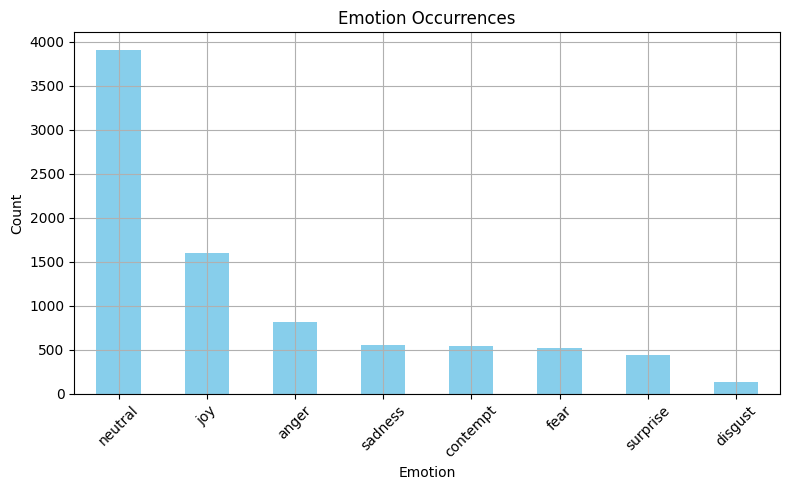

In [65]:
# Count the occurrences of each emotion
emotion_counts = train_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

In [66]:
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]


# combined list of stopwords for both English and Hindi

In [67]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(lowercase_transliterated_text)  # Add your Hindi stopwords here

stop_words.update(hindi_stop_words)
#stop_words

# Preprocessing code for each utterance

In [68]:
train_df.head(2)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt


In [69]:
import sentencepiece as spm

# Combine training and test data into a single dataframe
combined_df = train_df

# Save the combined utterances to a text file
combined_df['Utterances'].to_csv('combined_text.txt', index=False, header=False)

# Train SentencePiece model
spm.SentencePieceTrainer.train('--input=combined_text.txt --model_prefix=mymodel --vocab_size=5000')

# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('mymodel.model')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=combined_text.txt --model_prefix=mymodel --vocab_size=5000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: combined_text.txt
  input_format: 
  model_prefix: mymodel
  model_type: UNIGRAM
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <

True

bj=9.52673 num_tokens=35675 num_tokens/piece=6.48636
unigram_model_trainer.cc(580) LOG(INFO) EM sub_iter=1 size=5498 obj=9.51503 num_tokens=35676 num_tokens/piece=6.48891
trainer_interface.cc(686) LOG(INFO) Saving model: mymodel.model
trainer_interface.cc(698) LOG(INFO) Saving vocabs: mymodel.vocab


In [70]:
import sentencepiece as spm
import pandas as pd

# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('mymodel.model')  # Replace 'mymodel.model' with the actual path to your trained SentencePiece model

# Load your training data
# Replace 'your_training_data.csv' with the actual path to your training data CSV file
# Function to preprocess text using SentencePiece
def preprocess_text_with_sentencepiece(text, sp_processor):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize using SentencePiece
    tokens = sp_processor.encode_as_pieces(text)
    text = ' '.join(tokens)

    # Remove extra white spaces
    text = ' '.join(text.split())

    return text

In [71]:
train_data = train_df


In [72]:
train_data = train_df


In [73]:
# Apply preprocessing to the 'Utterances' column
train_data['Clean_text'] = train_data['Utterances'].apply(lambda x: preprocess_text_with_sentencepiece(x, sp))

# Display the preprocessed data
#print(train_data[['Utterances', 'Clean_text', 'Emotions']])
train_data.head(2)

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,"▁ok , ▁chalo ▁rosesh ▁chalo ▁bahar"


In [74]:
import re

def remove_numeric_sequences_and_ordinals(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    return text

In [75]:
def remove_puntuations(txt):
    punct = set(string.punctuation)
    txt = " ".join(txt.split("."))
    txt = " ".join(txt.split("!"))
    txt = " ".join(txt.split("?"))
    txt = " ".join(txt.split(":"))
    txt = " ".join(txt.split(";"))
    
    txt = "".join(ch for ch in txt if ch not in punct)
    return txt

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [77]:
# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    #remove numeric and ordinals 
    text = remove_numeric_sequences_and_ordinals(text)

    # Remove punctuation
    text = remove_puntuations(text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])
    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [78]:
preprocess_text("▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...")


'▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n'

In [79]:
train_df = train_data
train_df.head(2)

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,"▁ok , ▁chalo ▁rosesh ▁chalo ▁bahar"


In [80]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...	')

'kya kya bhar rakha indravadan gha'

In [81]:
# Apply preprocessing to the 'Utterances' column
train_df['Clean_text'] = train_df['Clean_text'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
train_df.head(2)

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar


In [83]:
val_data = val_df
val_data.head()

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hama...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per


In [84]:
# Apply preprocessing to the 'Utterances' column
val_data['Clean_text'] = val_data['Utterances'].apply(lambda x: preprocess_text_with_sentencepiece(x, sp))

# Display the preprocessed data
#print(val_data[['Utte

In [85]:
val_df = val_data


In [86]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Clean_text'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,▁ye ▁kya ▁kar ▁raha ▁hai ▁rosesh ▁bharat ▁tera...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,▁hahaha ▁khat ▁padh ▁le ▁rosesh ▁baby ▁or ▁pad...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,▁kavita ▁acchi ▁hai ▁lekin ▁khayal ▁achcha ▁na...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,▁galat ▁hai ▁par ▁momma ▁ne ▁tumse ▁kaha ▁tha ...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,▁galat ▁tha ▁per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,▁sahil ▁sahil ▁sahil ▁sirf ▁ ▁din ▁bache ▁hai ...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,▁haan ▁lekin ▁mom ▁un n ▁char ▁me ▁se ▁kisi ▁e...
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,▁mummy ▁ji ▁ko ▁to ▁unme ▁se ▁koi ▁pa sand ▁nh...
1352,prefinale,sahil,rosesh ko?,neutral,▁rosesh ▁ko


In [87]:
train = train_df[["Emotions","Clean_text"]]
train.head()

,Emotions,Clean_text
0,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...
1,contempt,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar
2,anger,▁momma ▁hath ▁chhodiye ▁dad
3,neutral,▁dekho ▁maya ▁ya ▁na ▁bol ▁raha ▁hai ▁fir ▁tum...
4,neutral,▁indravadan ▁tum ▁kitne ▁salo ▁se ▁ye ▁joke ▁m...


In [88]:
validation = val_df[["Emotions","Clean_text"]]

In [89]:
# Convert the titles to lowercase
validation['Clean_text'] = validation['Clean_text'].map(lambda x: x.lower())
validation.head()

/tmp/ipykernel_50635/1384124703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Clean_text'] = validation['Clean_text'].map(lambda x: x.lower())


,Emotions,Clean_text
0,neutral,▁ye ▁kya ▁kar ▁raha ▁hai ▁rosesh ▁bharat ▁tera...
1,neutral,▁hahaha ▁khat ▁padh ▁le ▁rosesh ▁baby ▁or ▁pad...
2,neutral,▁kavita ▁acchi ▁hai ▁lekin ▁khayal ▁achcha ▁na...
3,contempt,▁galat ▁hai ▁par ▁momma ▁ne ▁tumse ▁kaha ▁tha ...
4,neutral,▁galat ▁tha ▁per


In [90]:
# Convert the titles to lowercase
train['Clean_text'] = train['Clean_text'].map(lambda x: x.lower())
train.head()

/tmp/ipykernel_50635/2552075389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Clean_text'] = train['Clean_text'].map(lambda x: x.lower())


,Emotions,Clean_text
0,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...
1,contempt,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar
2,anger,▁momma ▁hath ▁chhodiye ▁dad
3,neutral,▁dekho ▁maya ▁ya ▁na ▁bol ▁raha ▁hai ▁fir ▁tum...
4,neutral,▁indravadan ▁tum ▁kitne ▁salo ▁se ▁ye ▁joke ▁m...


Tokenization

In [91]:
from nltk.tokenize import word_tokenize
#Word tokenization
train.loc[:,'text'] =train['Clean_text'].apply(lambda x : word_tokenize(x))

train[['Clean_text','text']].head()

/tmp/ipykernel_50635/2104870369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,'text'] =train['Clean_text'].apply(lambda x : word_tokenize(x))


,Clean_text,text
0,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...,"[▁kya, ▁kya, ▁bhar, ▁ke, ▁rakha, ▁hai, ▁indrav..."
1,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar,"[▁ok, ▁chalo, ▁rosesh, ▁chalo, ▁bahar]"
2,▁momma ▁hath ▁chhodiye ▁dad,"[▁momma, ▁hath, ▁chhodiye, ▁dad]"
3,▁dekho ▁maya ▁ya ▁na ▁bol ▁raha ▁hai ▁fir ▁tum...,"[▁dekho, ▁maya, ▁ya, ▁na, ▁bol, ▁raha, ▁hai, ▁..."
4,▁indravadan ▁tum ▁kitne ▁salo ▁se ▁ye ▁joke ▁m...,"[▁indravadan, ▁tum, ▁kitne, ▁salo, ▁se, ▁ye, ▁..."


In [92]:
len(train)

8506

In [93]:
from nltk.tokenize import word_tokenize
#Word tokenization
validation.loc[:,'text'] =validation['Clean_text'].apply(lambda x : word_tokenize(x))

validation[['Clean_text','text']].head(2)

/tmp/ipykernel_50635/4071832904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation.loc[:,'text'] =validation['Clean_text'].apply(lambda x : word_tokenize(x))


,Clean_text,text
0,▁ye ▁kya ▁kar ▁raha ▁hai ▁rosesh ▁bharat ▁tera...,"[▁ye, ▁kya, ▁kar, ▁raha, ▁hai, ▁rosesh, ▁bhara..."
1,▁hahaha ▁khat ▁padh ▁le ▁rosesh ▁baby ▁or ▁pad...,"[▁hahaha, ▁khat, ▁padh, ▁le, ▁rosesh, ▁baby, ▁..."


In [94]:
# Concatenating the DataFrames
concatenated_df = pd.concat([train, validation], ignore_index=True)

# Displaying the concatenated DataFrame
print(concatenated_df.head(2))

   Emotions                                         Clean_text  \
0   disgust  ▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...   
1  contempt                   ▁ok ▁chalo ▁rosesh ▁chalo ▁bahar   

                                                text  
0  [▁kya, ▁kya, ▁bhar, ▁ke, ▁rakha, ▁hai, ▁indrav...  
1             [▁ok, ▁chalo, ▁rosesh, ▁chalo, ▁bahar]  


In [95]:
len(concatenated_df)

9860

In [96]:
concatenated_df.head(2)

,Emotions,Clean_text,text
0,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...,"[▁kya, ▁kya, ▁bhar, ▁ke, ▁rakha, ▁hai, ▁indrav..."
1,contempt,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar,"[▁ok, ▁chalo, ▁rosesh, ▁chalo, ▁bahar]"


In [97]:
X_train =  train["text"]

In [98]:
train.head(2)

,Emotions,Clean_text,text
0,disgust,▁kya ▁kya ▁bhar ▁ke ▁rakha ▁hai ▁indravadan ▁n...,"[▁kya, ▁kya, ▁bhar, ▁ke, ▁rakha, ▁hai, ▁indrav..."
1,contempt,▁ok ▁chalo ▁rosesh ▁chalo ▁bahar,"[▁ok, ▁chalo, ▁rosesh, ▁chalo, ▁bahar]"


In [99]:
Y_train = train["Emotions"]

In [100]:
X_val = validation["text"]

In [101]:
Y_val = validation["Emotions"]

In [102]:
#Y_val

# Generating Word2Vec Model

In [103]:
from gensim.models import Word2Vec

# Skip-gram model. Below parameters have been selected after doing cross validation 
size_dim = 100 # Default number of dimensions of the embeddings. So no need to add separatley
window = 3 #Maximum distance between a target word and words around the target word
min_count = 5 #Minimum count of words considered while training the model, words with lesser occurence will be ignored
sg = 1 #for skip gram model = 1 and for  CBOW =0
emotion_processed = pd.Series(concatenated_df['text']).values

# Train the Word2Vec Model
w2v_model = Word2Vec(emotion_processed,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)

In [104]:
#w2v_model.wv["hahaha"]

In [105]:
#w2v_model.wv['rosesh']

In [106]:
#w2v_model.wv['kya']

In [107]:
#X_train

In [108]:
import os
import pandas as pd
import numpy as np

# Define the output folder
OUTPUT_FOLDER = "/home/sysadm/Downloads/"

# Define the filename for the Word2Vec output
word2vec_filename = os.path.join(OUTPUT_FOLDER, 'train_emotion_word2vec.csv')

# Convert the series to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=['text'])

# Write the Word2Vec vectors to the CSV file
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train_df.iterrows():
        # Taking the average of vectors in a sentence
        model_vector = np.mean(
            [w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index],
            axis=0
        ).tolist()

        # Write the header for the file if it's the first line
        if index == 0:
            header = ",".join(str(ele) for ele in range(100))  # Assuming 100 dimensions
            word2vec_file.write(header)
            word2vec_file.write("\n")

        # Check if the line exists; otherwise, it's a vector of zeros
        if type(model_vector) is list:
            line = ",".join(str(vector_element) for vector_element in model_vector)
        else:
            line = ",".join(str(0) for _ in range(100))  # Assuming 100 dimensions
        word2vec_file.write(line)
        word2vec_file.write('\n')


/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model Training


In [109]:
# Load file in which features are stored
word2vec_df = pd.read_csv(r"/home/sysadm/Downloads/train_emotion_word2vec.csv")
word2vec_df=word2vec_df.fillna(0)

In [110]:
len(word2vec_df)

8506

In [111]:
# This dataframe consist of average of reviews
word2vec_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.075433,0.108191,-0.092560,0.040492,0.003268,-0.258610,0.016689,0.451333,-0.097688,-0.026941,...,0.227304,0.058626,0.138928,0.129568,0.305018,0.072766,-0.010248,-0.118895,-0.022385,-0.050178
1,-0.133549,0.028290,-0.033226,-0.043836,-0.121718,-0.187025,0.027070,0.286467,-0.162144,0.101765,...,0.183369,0.079377,0.180826,0.138956,0.360810,0.196751,0.100994,-0.187438,0.015607,-0.215886
2,-0.140711,0.142399,-0.064019,0.034644,0.057126,-0.252663,0.059129,0.414617,-0.124974,-0.095060,...,0.239913,0.049656,0.070419,0.082267,0.289875,0.065371,0.013066,-0.190377,0.036406,-0.076972


In [112]:
# Create a DataFrame from the 'Emotions' data
Y_train = pd.DataFrame(Y_train, columns=['Emotions'])

# Display the DataFrame
print(Y_train.head(2))

   Emotions
0   disgust
1  contempt


In [113]:
# Create a DataFrame from the 'Emotions' data
Y_val = pd.DataFrame(Y_val, columns=['Emotions'])

# Display the DataFrame
print(Y_val.head(2))

  Emotions
0  neutral
1  neutral


# Fit the random Forest Classifier

In [114]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
clf_decision_word2vec = RandomForestClassifier(
    n_estimators=80,
    min_samples_split=2,
    min_samples_leaf=2,
    max_depth=12,
    criterion='entropy',
    bootstrap=True,
    class_weight='balanced'
) 

start_time = time.time()

# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['Emotions'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))


Time taken to fit the model with word2vec vectors: 9.864168643951416


Performance on Train Set


In [115]:
X_train_df = pd.DataFrame(X_train, columns=['text'])


In [116]:
X_val_df = pd.DataFrame(X_val, columns=['text'])


In [117]:
w2v_model

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

train_features = []

for index, row in X_train_df.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        train_features.append(vector)
    else:
        train_features.append(np.array([0 for i in range(100)]))
        
train_predictions = clf_decision_word2vec.predict(train_features)

print(classification_report(Y_train['Emotions'],train_predictions))

/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

       anger       0.89      0.96      0.93       819
    contempt       0.69      0.98      0.81       542
     disgust       0.72      0.98      0.83       127
        fear       0.88      0.96      0.92       514
         joy       0.91      0.92      0.91      1596
     neutral       0.99      0.84      0.91      3909
     sadness       0.85      0.96      0.90       558
    surprise       0.73      0.94      0.82       441

    accuracy                           0.90      8506
   macro avg       0.83      0.94      0.88      8506
weighted avg       0.91      0.90      0.90      8506



In [119]:
import seaborn as sns

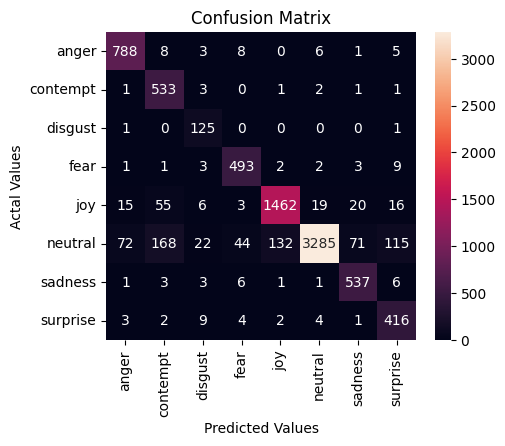

In [120]:
cm = confusion_matrix(Y_train['Emotions'],train_predictions)
cm_df = pd.DataFrame(cm,
                     index = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"], 
                     columns = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Performance on Validation Set


In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

val_features = []

for index, row in X_val_df.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        val_features.append(vector)
    else:
        val_features.append(np.array([0 for i in range(100)]))
        
val_predictions = clf_decision_word2vec.predict(val_features)

print(classification_report(Y_val['Emotions'],val_predictions))

              precision    recall  f1-score   support

       anger       0.14      0.10      0.12       118
    contempt       0.12      0.27      0.17        74
     disgust       0.22      0.10      0.13        21
        fear       0.13      0.06      0.08        88
         joy       0.24      0.23      0.24       228
     neutral       0.51      0.55      0.53       633
     sadness       0.17      0.13      0.15       126
    surprise       0.30      0.26      0.28        66

    accuracy                           0.35      1354
   macro avg       0.23      0.21      0.21      1354
weighted avg       0.34      0.35      0.34      1354



/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [122]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val['Emotions'], val_predictions))

Confusion Matrix:
[[ 12  20   0   4  23  50   7   2]
 [  4  20   2   0  13  28   6   1]
 [  2   4   2   0   6   5   2   0]
 [  9   5   0   5   9  52   7   1]
 [ 11  33   1   6  53  93  20  11]
 [ 40  68   3  17 101 345  37  22]
 [  5  14   1   4  11  71  17   3]
 [  2   2   0   3   5  34   3  17]]


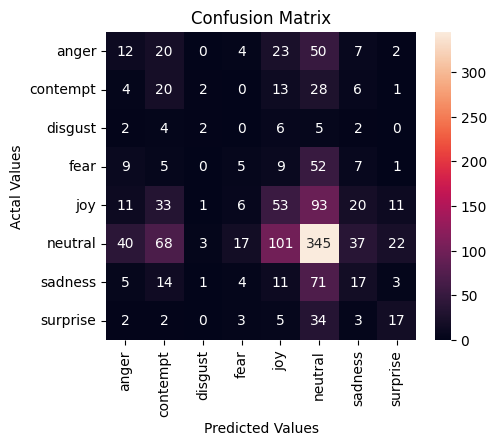

In [123]:
cm = confusion_matrix(Y_val['Emotions'],val_predictions)
cm_df = pd.DataFrame(cm,
                     index = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"], 
                     columns = ['anger','contempt','disgust',"fear","joy","neutral","sadness","surprise"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# KNN Model

In [124]:
from sklearn.preprocessing import StandardScaler


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the range of k values to try
k_values = range(1, 17,2)

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize lists to store mean accuracy for each value of k
mean_accuracy_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize the KNN classifier
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and store the mean accuracy
    mean_accuracy = cross_val_score(clf_knn, word2vec_df_scaled, Y_train['Emotions'], cv=5, scoring='accuracy').mean()
    mean_accuracy_values.append(mean_accuracy)

# Identify the best value of k with the highest mean accuracy
best_k = k_values[mean_accuracy_values.index(max(mean_accuracy_values))]
print(best_k)
# Initialize the KNN classifier with the best k
clf_knn = KNeighborsClassifier(n_neighbors=best_k)

start_time = time.time()

# Fit the KNN model with the best k value
clf_knn.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the KNN model with word2vec vectors: " + str(time.time() - start_time))

15
Time taken to fit the KNN model with word2vec vectors: 0.010610818862915039


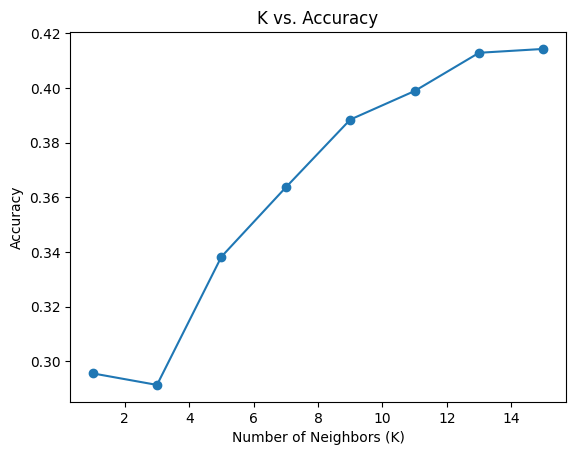

In [135]:
import matplotlib.pyplot as plt

# Plot the relationship between k and accuracy
plt.plot(k_values, mean_accuracy_values, marker='o')
plt.title('K vs. Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize the KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=6)  # You can adjust the number of neighbors

start_time = time.time()

# Fit the KNN model
clf_knn.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the KNN model with word2vec vectors: " + str(time.time() - start_time))

from sklearn.metrics import classification_report

# Calculate the mean of the word2vec vectors for each row in the validation set
val_features = []
for index, row in X_val_df.iterrows():
    vector = np.mean([w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index], axis=0)
    if type(vector) is np.ndarray:
        val_features.append(vector)
    else:
        val_features.append(np.array([0 for i in range(100)]))

# Make predictions on the validation set
val_predictions = clf_knn.predict(val_features)

# Print the classification report for the validation set
print(classification_report(Y_val['Emotions'], val_predictions))


Time taken to fit the KNN model with word2vec vectors: 0.011705160140991211
              precision    recall  f1-score   support

       anger       0.09      0.78      0.16       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.14      0.07      0.09       228
     neutral       0.40      0.12      0.19       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.14      1354
   macro avg       0.08      0.12      0.06      1354
weighted avg       0.22      0.14      0.12      1354



/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.lo

In [137]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val['Emotions'], val_predictions))

Confusion Matrix:
[[ 92   1   0   0   8  17   0   0]
 [ 61   0   0   0   2  11   0   0]
 [ 13   0   0   0   2   6   0   0]
 [ 66   1   0   0  11  10   0   0]
 [166   0   0   1  16  45   0   0]
 [494   1   0   2  57  79   0   0]
 [ 95   0   0   1  14  16   0   0]
 [ 46   0   0   1   6  13   0   0]]


# Naive bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize the Naive Bayes classifier
clf_bayes = GaussianNB()

start_time = time.time()

# Fit the Naive Bayes model
clf_bayes.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the Naive Bayes model with word2vec vectors: " + str(time.time() - start_time))

from sklearn.metrics import classification_report

# Calculate the mean of the word2vec vectors for each row in the validation set
val_features = []
for index, row in X_val_df.iterrows():
    vector = np.mean([w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index], axis=0)
    if type(vector) is np.ndarray:
        val_features.append(vector)
    else:
        val_features.append(np.array([0 for i in range(100)]))

# Make predictions on the validation set
val_predictions = clf_bayes.predict(val_features)

# Print the classification report for the validation set
print(classification_report(Y_val['Emotions'], val_predictions))
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val['Emotions'], val_predictions))

Time taken to fit the Naive Bayes model with word2vec vectors: 0.014761209487915039
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.05      1.00      0.10        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.00      0.00      0.00       228
     neutral       0.00      0.00      0.00       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.05      1354
   macro avg       0.01      0.12      0.01      1354
weighted avg       0.00      0.05      0.01      1354

Confusion Matrix:
[[  0 118   0   0   0   0   0   0]
 [  0  74   0   0   0   0   0   0]
 [  0  21   0   0   0   0   0   0]
 [  0  88   0   0   0   0   0   0]
 [  0 228   0   0   0   0   0   0]
 [  0 633   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0]
 [

/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.lo

# SVM Kernal

In [139]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize the SVM classifier with a linear kernel
clf_svm_linear = SVC(kernel='linear')

start_time = time.time()

# Fit the SVM model with a linear kernel
clf_svm_linear.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the SVM model with a linear kernel: " + str(time.time() - start_time))

# Calculate the mean of the word2vec vectors for each row in the validation set
val_features = []
for index, row in X_val_df.iterrows():
    vector = np.mean([w2v_model.wv[token] for token in row['text'] if token in w2v_model.wv.key_to_index], axis=0)
    if type(vector) is np.ndarray:
        val_features.append(vector)
    else:
        val_features.append(np.array([0 for i in range(100)]))

# Make predictions on the validation set using the linear kernel SVM model
val_predictions_linear = clf_svm_linear.predict(val_features)

# Print the classification report for the validation set using the linear kernel SVM model
print("Classification Report for Linear Kernel SVM:")
print(classification_report(Y_val['Emotions'], val_predictions_linear))
# Print the confusion matrix for the linear kernel SVM model
print("Confusion Matrix for Linear Kernel SVM:")
print(confusion_matrix(Y_val['Emotions'], val_predictions_linear))



Time taken to fit the SVM model with a linear kernel: 23.85185480117798


/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sysadm/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Classification Report for Linear Kernel SVM:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.00      0.00      0.00       228
     neutral       0.47      1.00      0.64       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.47      1354
   macro avg       0.06      0.12      0.08      1354
weighted avg       0.22      0.47      0.30      1354

Confusion Matrix for Linear Kernel SVM:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   0 228   0   0]
 [  0   0   0   0   0 633   0   0]
 [  0   0   0   0   0 126   0   0]
 [  0   0   0   0  

/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# Initialize the SVM classifier with a polynomial kernel
clf_svm_poly = SVC(kernel='poly')

start_time = time.time()

# Fit the SVM model with a polynomial kernel
clf_svm_poly.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the SVM model with a polynomial kernel: " + str(time.time() - start_time))

# Make predictions on the validation set using the polynomial kernel SVM model
val_predictions_poly = clf_svm_poly.predict(val_features)

# Print the classification report for the validation set using the polynomial kernel SVM model
print("Classification Report for Polynomial Kernel SVM:")
print(classification_report(Y_val['Emotions'], val_predictions_poly))
# Print the confusion matrix for the polynomial kernel SVM model
print("Confusion Matrix for Polynomial Kernel SVM:")
print(confusion_matrix(Y_val['Emotions'], val_predictions_poly))


Time taken to fit the SVM model with a polynomial kernel: 5.070507049560547
Classification Report for Polynomial Kernel SVM:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.00      0.00      0.00       228
     neutral       0.47      1.00      0.64       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.47      1354
   macro avg       0.06      0.12      0.08      1354
weighted avg       0.22      0.47      0.30      1354

Confusion Matrix for Polynomial Kernel SVM:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   0 228   0   0]
 [  0

/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize the SVM classifier with an intersection kernel
clf_svm_intersection = SVC(kernel='sigmoid')

start_time = time.time()

# Fit the SVM model with an intersection kernel
clf_svm_intersection.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the SVM model with an intersection kernel: " + str(time.time() - start_time))

# Make predictions on the validation set using the intersection kernel SVM model
val_predictions_intersection = clf_svm_intersection.predict(val_features)

# Print the classification report for the validation set using the intersection kernel SVM model
print("Classification Report for Intersection Kernel SVM:")
print(classification_report(Y_val['Emotions'], val_predictions_intersection))
# Print the confusion matrix for the intersection kernel SVM model
print("Confusion Matrix for Intersection Kernel SVM:")
print(confusion_matrix(Y_val['Emotions'], val_predictions_intersection))


Time taken to fit the SVM model with an intersection kernel: 3.5148606300354004
Classification Report for Intersection Kernel SVM:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.00      0.00      0.00       228
     neutral       0.47      1.00      0.64       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.47      1354
   macro avg       0.06      0.12      0.08      1354
weighted avg       0.22      0.47      0.30      1354

Confusion Matrix for Intersection Kernel SVM:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   0 228   0   

/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
word2vec_df_scaled = scaler.fit_transform(word2vec_df)

# Initialize the logistic regression classifier
clf_logistic = LogisticRegression()

start_time = time.time()

# Fit the logistic regression model
clf_logistic.fit(word2vec_df_scaled, Y_train['Emotions'])
print("Time taken to fit the Logistic Regression model: " + str(time.time() - start_time))

# Make predictions on the validation set using the logistic regression model
val_predictions_logistic = clf_logistic.predict(val_features)

# Print the classification report for the validation set using the logistic regression model
print("Classification Report for Logistic Regression:")
print(classification_report(Y_val['Emotions'], val_predictions_logistic))
# Print the confusion matrix for the logistic regression model
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(Y_val['Emotions'], val_predictions_logistic))


Time taken to fit the Logistic Regression model: 0.43450260162353516
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       118
    contempt       0.00      0.00      0.00        74
     disgust       0.00      0.00      0.00        21
        fear       0.00      0.00      0.00        88
         joy       0.00      0.00      0.00       228
     neutral       0.47      1.00      0.64       633
     sadness       0.00      0.00      0.00       126
    surprise       0.00      0.00      0.00        66

    accuracy                           0.47      1354
   macro avg       0.06      0.12      0.08      1354
weighted avg       0.22      0.47      0.30      1354

Confusion Matrix for Logistic Regression:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   0 228   0   0]
 [  0   0   0   

/home/sysadm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and bei